# Retrieving and formatting 1st data set

In [20]:
from collections import defaultdict
import numpy as np

index_to_word = {}
with open('imdb.vocab', 'r', encoding='utf-8') as vocab_file:
    for index, word in enumerate(vocab_file):
        index_to_word[str(index)] = word.strip()

word_to_index = {word: index for index, word in index_to_word.items()}

word_doc_freq = defaultdict(int)

total_docs = 0

with open('labeledBow.feat', 'r', encoding='utf-8') as feat_file:
    for line in feat_file:
        total_docs += 1
        features = line.strip().split()[1:]
        for feature in features:
            word_index, _ = feature.split(':')
            word_doc_freq[word_index] += 1

min_docs = total_docs * 0.01
max_docs = total_docs * 0.5

filtered_indices = {word_index for word_index, doc_freq in word_doc_freq.items()
                    if min_docs <= doc_freq <= max_docs}

print(filtered_indices)
filtered_words = [index_to_word[word_index] for word_index in filtered_indices if word_index in index_to_word]

print(f"Number of features before filtering: {len(word_doc_freq)}")
print(f"Number of features after filtering: {len(filtered_words)}")

print(f"Total words: {len(word_doc_freq)}")
print(f"Words appearing in more than 50% of documents: {sum(1 for freq in word_doc_freq.values() if freq > max_docs)}")
print(f"Words appearing in less than 1% of documents: {sum(1 for freq in word_doc_freq.values() if freq < min_docs)}")



{'370', '794', '306', '1081', '1658', '1227', '216', '492', '63', '1052', '1017', '472', '1306', '541', '534', '499', '1136', '999', '692', '549', '1347', '515', '166', '1009', '1712', '575', '1707', '1305', '1638', '954', '333', '1426', '646', '1649', '357', '917', '416', '890', '59', '1141', '1239', '633', '568', '1318', '1597', '970', '862', '1459', '431', '94', '1601', '1244', '1672', '183', '203', '461', '1063', '1605', '1071', '1316', '458', '634', '1133', '1029', '200', '1565', '1310', '1739', '1557', '1465', '1886', '1168', '1522', '1315', '93', '967', '739', '1105', '761', '1802', '1652', '404', '123', '481', '639', '1314', '1284', '1117', '1374', '220', '429', '187', '1900', '1453', '1089', '716', '1116', '1938', '677', '286', '538', '149', '742', '43', '40', '70', '1414', '1591', '85', '124', '1391', '1087', '1800', '644', '1528', '979', '1720', '1074', '861', '896', '813', '1530', '1661', '1539', '1541', '903', '1248', '382', '373', '1647', '1269', '1444', '1513', '720', '6

In [21]:
# Turns values into a matrix
from collections import defaultdict
import numpy as np


num_documents = 25000
filtered_indices = sorted([int(index) for index in filtered_indices])
num_features = len(filtered_indices)

XD1 = np.zeros((num_documents, num_features))
yD1 = np.zeros(num_documents)

index_mapping = {str(old_index): new_index for new_index, old_index in enumerate(filtered_indices)}
print(index_mapping)

with open('labeledBow.feat', 'r') as file:
    for doc_id, line in enumerate(file):
        parts = line.strip().split()
        if len(parts) > 1:
            yD1[doc_id] = int(parts[0])
            for feature in parts[1:]:
                word_index, count = feature.split(':')
                if word_index in index_mapping.keys():
                    XD1[doc_id, index_mapping[word_index]] = int(count)



num_documents = 25000
filtered_indices_test = sorted([int(index) for index in filtered_indices])
num_features_test = len(filtered_indices)

XtestD1 = np.zeros((num_documents, num_features))
ytestD1 = np.zeros(num_documents)

index_mapping_test = {str(old_index): new_index for new_index, old_index in enumerate(filtered_indices)}

with open('labeledBowTest.feat', 'r') as file:
    for doc_id, line in enumerate(file):
        parts = line.strip().split()
        if len(parts) > 1:
            ytestD1[doc_id] = int(parts[0])
            for feature in parts[1:]:
                word_index, count = feature.split(':')
                if word_index in index_mapping_test.keys():
                    XtestD1[doc_id, index_mapping_test[word_index]] = int(count)

yD1_logistic = (yD1 > 5).astype(int)
ytestD1_logistic = (ytestD1 > 5).astype(int)
print(yD1)

{'21': 0, '23': 1, '27': 2, '30': 3, '31': 4, '32': 5, '33': 6, '34': 7, '35': 8, '36': 9, '37': 10, '38': 11, '39': 12, '40': 13, '41': 14, '42': 15, '43': 16, '44': 17, '45': 18, '46': 19, '47': 20, '48': 21, '49': 22, '50': 23, '51': 24, '52': 25, '53': 26, '54': 27, '55': 28, '56': 29, '57': 30, '58': 31, '59': 32, '60': 33, '61': 34, '62': 35, '63': 36, '64': 37, '65': 38, '66': 39, '67': 40, '68': 41, '69': 42, '70': 43, '71': 44, '72': 45, '73': 46, '74': 47, '75': 48, '76': 49, '77': 50, '78': 51, '79': 52, '80': 53, '81': 54, '82': 55, '83': 56, '84': 57, '85': 58, '86': 59, '87': 60, '88': 61, '89': 62, '90': 63, '91': 64, '92': 65, '93': 66, '94': 67, '95': 68, '96': 69, '97': 70, '98': 71, '99': 72, '100': 73, '101': 74, '102': 75, '103': 76, '104': 77, '105': 78, '106': 79, '107': 80, '108': 81, '109': 82, '110': 83, '111': 84, '112': 85, '113': 86, '114': 87, '115': 88, '116': 89, '117': 90, '118': 91, '119': 92, '120': 93, '121': 94, '122': 95, '123': 96, '124': 97, '125

#Simple Linear Regression on 1st Data set


Predicting sentiment scores using linear regression:
Actual sentiments scores
[10. 10.  7. ...  4.  1.  1.]


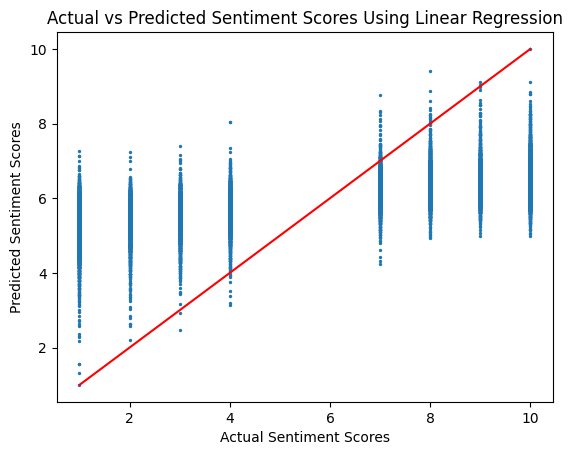

Top features with their corresponding coefficients
effort: correlation coefficient = -0.2637821530297363
surprised: correlation coefficient = 0.2639369154584188
jr: correlation coefficient = 0.2644689115884669
blame: correlation coefficient = -0.26464701809717966
classic: correlation coefficient = 0.2653801465589186
brain: correlation coefficient = -0.265646448079963
result: correlation coefficient = -0.2658151023999954
biggest: correlation coefficient = -0.26607524167163793
noticed: correlation coefficient = 0.26732001356289037
stunning: correlation coefficient = 0.26883606809133975
plus: correlation coefficient = -0.2688664837947032
numerous: correlation coefficient = -0.2699477805396921
smart: correlation coefficient = 0.27052372231153055
hours: correlation coefficient = -0.2712823856361146
tired: correlation coefficient = -0.27187976311006723
follows: correlation coefficient = 0.27316462883813036
feelings: correlation coefficient = 0.2732566050520948
personally: correlation coeffic

In [22]:
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.w = None

    def fit(self, x, y):
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])  # Add bias term
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])
        return x @ self.w

model = LinearRegression(add_bias=True)
model.fit(XD1, yD1)

print("Predicting sentiment scores using linear regression:")
predictions = model.predict(XtestD1)
#Applying min/max normalization to adjust range
min_val = np.min(predictions)
max_val = np.max(predictions)
normalized_predictions = ((predictions - min_val) / (max_val - min_val)) * 9 + 1

print("Actual sentiments scores")
print(ytestD1)
plt.scatter(ytestD1, normalized_predictions, s=2)
plt.plot([min(ytestD1), max(ytestD1)], [min(ytestD1), max(ytestD1)], color='red') # Line of y=x
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.title('Actual vs Predicted Sentiment Scores Using Linear Regression')
plt.savefig("linRegressionPredictions.png")
plt.show()


coefficients = model.w[:-1] if model.add_bias else model.w

D = 200
top_features_indicesD1 = np.argsort(np.abs(coefficients))[-D:]

print("Top features with their corresponding coefficients")
feature_namesD1 = []
for i in top_features_indicesD1:
    word = index_to_word[str(filtered_indices[i])]
    feature_namesD1.append(word)
    coef = coefficients[i]
    print(f"{word}: correlation coefficient = {coef}")




```
# This is formatted as code
```

# Top 20 Most Positive and Negative Features

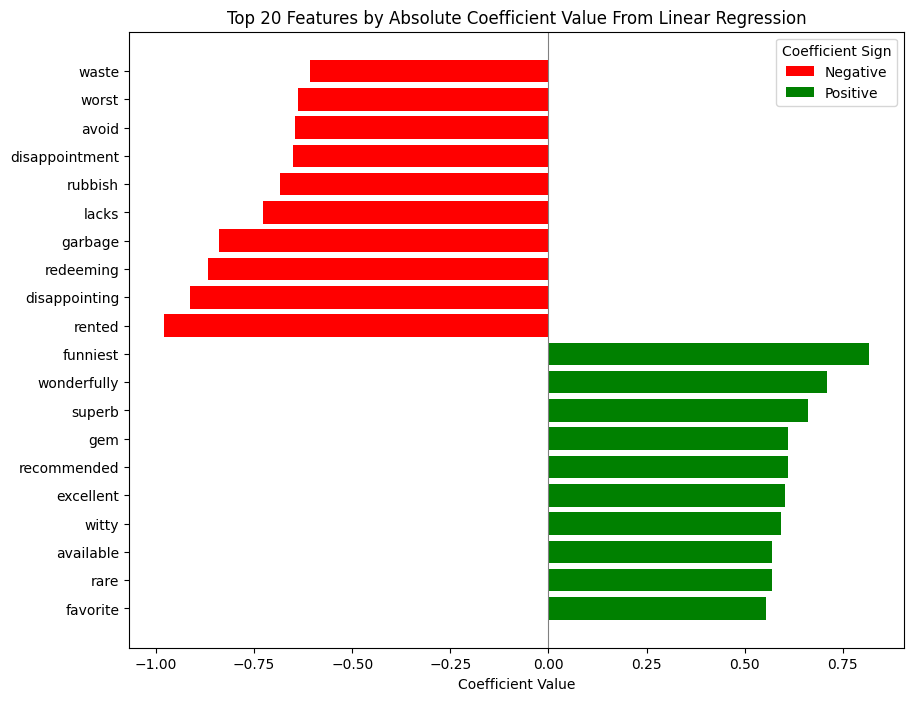

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

top_features_indicesD1 = np.argsort(np.abs(coefficients))[-D:]
coef_list = [(i, coefficients[i]) for i in top_features_indicesD1]
coef_list_sorted = sorted(coef_list, key=lambda x: x[1])

top_negative_indices = [i for i, coef in coef_list_sorted[:10]]
top_positive_indices = [i for i, coef in coef_list_sorted[-10:]]


neg_feats = [index_to_word[str(filtered_indices[i])] for i in top_negative_indices]
neg_coefs = [coefficients[i] for i in top_negative_indices]
pos_feats = [index_to_word[str(filtered_indices[i])] for i in top_positive_indices]
pos_coefs = [coefficients[i] for i in top_positive_indices]

neg_feats = neg_feats[::-1]

feats = pos_feats + neg_feats
coefs = pos_coefs + neg_coefs

colors = ['green'] * len(neg_coefs) + ['red'] * len(pos_coefs)

plt.figure(figsize=(10, 8))
plt.barh(feats, coefs, color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features by Absolute Coefficient Value From Linear Regression')
plt.axvline(x=0, color='grey', linewidth=0.8)  # Add a vertical line at x=0 to separate negative and positive values

legend_handles = [Patch(facecolor='red', label='Negative'),
                  Patch(facecolor='green', label='Positive')]

plt.legend(handles=legend_handles, title='Coefficient Sign')

plt.show()

# Logistic Model

In [24]:
logistic = lambda z: 1./ (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.verbose = verbose
        self.gradient_norms = []

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))
        grad = np.dot(x.T, yh - y)/N
        return grad

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            self.gradient_norms.append(np.linalg.norm(g))
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))
        return yh

# Modeling Logistic Regression for 1st data set (Experiment)

terminated after 1000 iterations, with norm of the gradient equal to 0.02109970642921842
the weight found: [-0.25216661  0.2340684   0.09160072 -0.14534604  0.28620699 -0.17698559
 -0.06683027 -0.09480021  0.04681794  0.21219809 -0.0413392   0.00805299
  0.06527358 -0.13087528 -0.1209779   0.14061532  0.18887478  0.11036103
  0.03009983  0.13320198  0.33972621  0.16902056  0.03161566 -0.36721071
  0.21838177 -0.00124939 -0.09530981 -0.33115141  0.2008416   0.01775262
 -0.21776274 -0.02542037 -0.05596709 -0.14582694  0.14687654 -0.16923156
  0.37574774 -0.10299656 -0.01014072 -0.12368067 -0.12448076  0.13647915
 -0.079767    0.13935106  0.00247988 -0.08435245  0.15569274  0.09845959
 -0.15787085 -0.17050552  0.30830751  0.08475562 -0.09428115 -0.29568015
  0.09623367 -0.15557197  0.1815118  -0.6484108   0.21516785  0.53773083
  0.05505042 -0.00718981 -0.4922578   0.26813818 -0.42569007 -0.36876321
 -0.59657298  0.05704059 -0.25250206 -0.18962517 -0.10710783  0.06199005
 -0.10902    -0.0

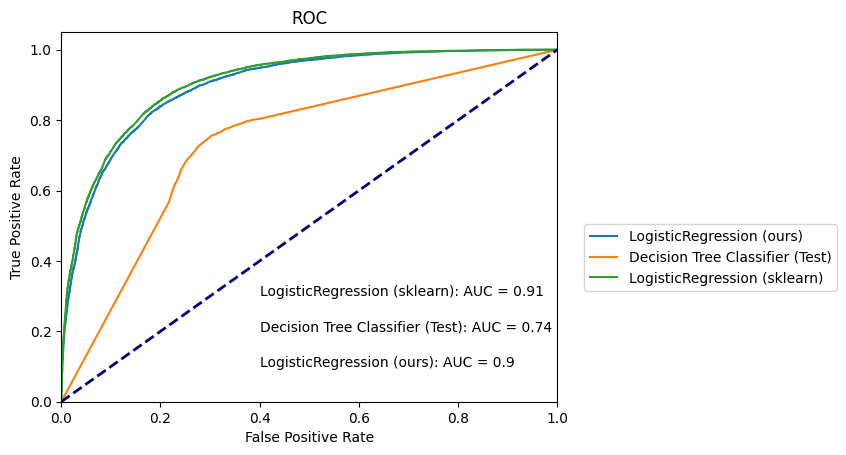

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


X_filtered = XD1[:, top_features_indicesD1]
X_test_filtered = XtestD1[:, top_features_indicesD1]

logit_model = LogisticRegression(verbose=True, max_iters=1e3, learning_rate = .1, epsilon=1e-5)

logit_model.fit(X_filtered, yD1_logistic)
y_train_prob = logit_model.predict(X_filtered)
y_test_prob = logit_model.predict(X_test_filtered)

y_train_pred = (y_train_prob > 0.5).astype(int)
print(y_train_pred)
y_test_pred = (y_test_prob > 0.5).astype(int)


acc_train = sum(y_train_pred==yD1_logistic)/len(yD1_logistic)
acc_test = sum(y_test_pred==ytestD1_logistic)/len(ytestD1_logistic)
print(f"train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

models = [DecisionTreeClassifier(),
          sk_LogisticRegression()]

perf = {}
fpr, tpr, _ = roc_curve(ytestD1_logistic, y_test_prob)
auroc = roc_auc_score(ytestD1_logistic, y_test_prob)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(X_filtered, yD1_logistic)
    y_test_prob = fit.predict_proba(X_test_filtered)[:,1]
    fpr, tpr, _ = roc_curve(ytestD1_logistic, y_test_prob)
    auroc = roc_auc_score(ytestD1_logistic, y_test_prob)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf["Decision Tree Classifier (Test)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}

plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
# plt.show()
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
# plt.close()


#Gradient Descent (Experiment)

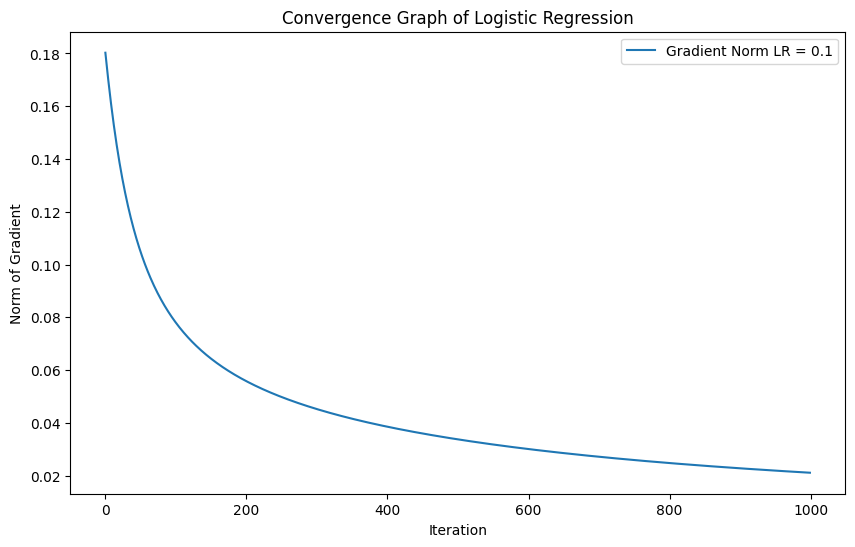

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(logit_model.gradient_norms, label='Gradient Norm LR = 0.1')

plt.xlabel('Iteration')
plt.ylabel('Norm of Gradient')
plt.title('Convergence Graph of Logistic Regression')
plt.legend()
plt.show()


#Top and Bottom coefficients (Experiment)

[('worst', -1.1074507064337549), ('waste', -0.9244564328569115), ('awful', -0.8003027475868776), ('boring', -0.7012061106476428), ('bad', -0.6484108032033294), ('terrible', -0.6342752100970296), ('poor', -0.6305079421676035), ('stupid', -0.5965729849433336), ('worse', -0.5947072386880264), ('horrible', -0.5694158799182895), ('dull', -0.4922577960312491), ('crap', -0.4866571366644694), ('poorly', -0.4860150208770189), ('annoying', -0.4658369368676938), ('ridiculous', -0.45307546678846683), ('lame', -0.44008507131451935), ('unfortunately', -0.42569006656360375), ('instead', -0.42428041612512674), ('avoid', -0.4159160516336767), ('mess', -0.4031233136386235), ('pointless', -0.3973891378283349), ('wasted', -0.3946925935983974), ('save', -0.37774337869498176), ('fails', -0.374544059080973), ('badly', -0.36876321308302684), ("couldn't", -0.3672107131215692), ('predictable', -0.34110623201421764), ('unless', -0.33898435798706456), ('guess', -0.33115141186711444), ('attempt', -0.31390038938062

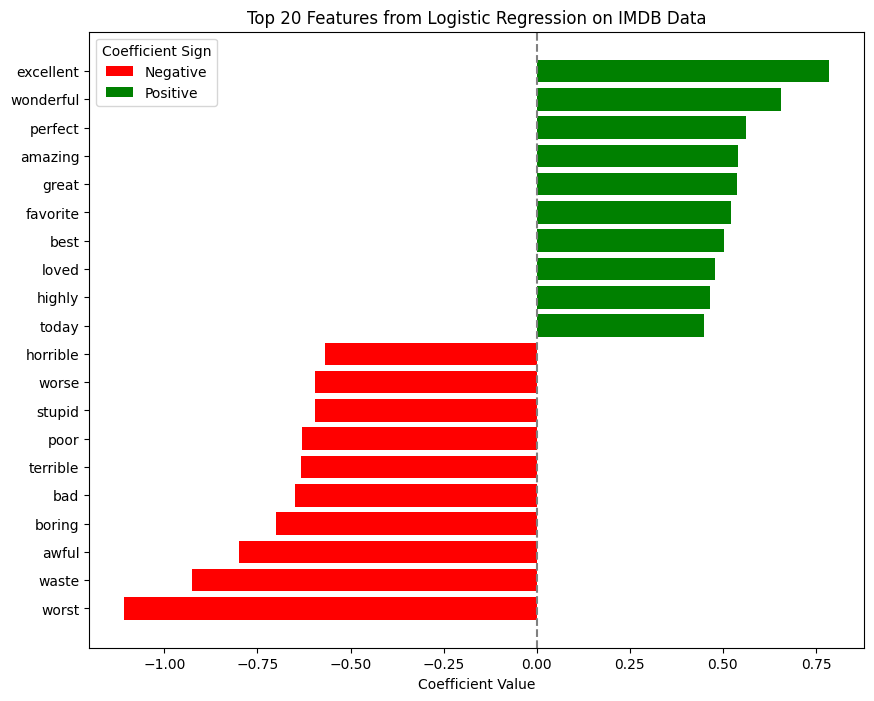

In [27]:
import numpy as np
import matplotlib.pyplot as plt


coefficients = logit_model.w[:-1] if logit_model.add_bias else logit_model.w
features_coefficients = list(zip(feature_namesD1, coefficients))
sorted_features = sorted(features_coefficients, key=lambda x: x[1])
print(sorted_features)
print(len(coefficients))
print(len(features_coefficients))

top_negative_features = sorted_features[:10]
top_positive_features = sorted_features[-10:]

top_features = top_negative_features + top_positive_features
feature_names, feature_values = zip(*top_features)

plt.figure(figsize=(10, 8))
y_positions = np.arange(len(feature_names))
plt.barh(y_positions, feature_values, color=['red' if x < 0 else 'green' for x in feature_values])
plt.yticks(y_positions, feature_names)
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features from Logistic Regression on IMDB Data')

plt.axvline(x=0, color='grey', linestyle='--')
legend_handles = [Patch(facecolor='red', label='Negative'),
                  Patch(facecolor='green', label='Positive')]
plt.legend(handles=legend_handles, title='Coefficient Sign')
plt.show()




# AUROC as a function of % data (Experiment)

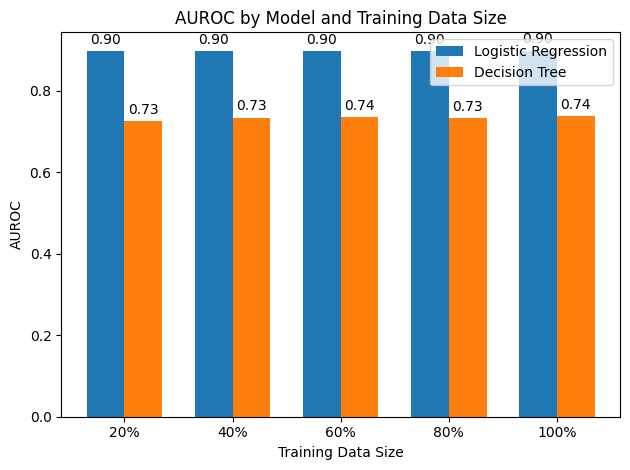

In [28]:
from sklearn.model_selection import train_test_split

training_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
auroc_scores_logit = []
auroc_scores_dt = []

for size in training_sizes:
    if size < 1.0:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_filtered, yD1_logistic, train_size=size, random_state=42)
    else:
        X_train_subset, y_train_subset = X_filtered, yD1_logistic

    logit_model = LogisticRegression(verbose=False, max_iters=1e3, learning_rate = .1, epsilon=1e-5)

    logit_model.fit(X_train_subset, y_train_subset)
    y_test_prob_logit = logit_model.predict(X_test_filtered)
    auroc_logit = roc_auc_score(ytestD1_logistic, y_test_prob_logit)
    auroc_scores_logit.append(auroc_logit)

    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train_subset, y_train_subset)
    y_test_prob_dt = dt_model.predict_proba(X_test_filtered)[:, 1]
    auroc_dt = roc_auc_score(ytestD1_logistic, y_test_prob_dt)
    auroc_scores_dt.append(auroc_dt)

fig, ax = plt.subplots()
index = np.arange(len(training_sizes))
bar_width = 0.35

rects1 = ax.bar(index, auroc_scores_logit, bar_width, label='Logistic Regression')
rects2 = ax.bar(index + bar_width, auroc_scores_dt, bar_width, label='Decision Tree')

for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Training Data Size')
ax.set_ylabel('AUROC')
ax.set_title('AUROC by Model and Training Data Size')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['20%', '40%', '60%', '80%', '100%'])
ax.legend()

plt.tight_layout()
plt.show()


# Retreiving and formatting 2nd Data set

In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
import numpy as np

categories = ['sci.med', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.politics.mideast']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=['headers', 'footers', 'quotes'])
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=['headers', 'footers', 'quotes'])

count_vect = CountVectorizer(stop_words='english', max_df=0.5, min_df=0.01)

X_train_counts = count_vect.fit_transform(newsgroups_train.data)
print(X_train_counts.shape)

X_test_counts = count_vect.transform(newsgroups_test.data)
mi_scores = mutual_info_classif(X_train_counts, newsgroups_train.target, discrete_features=True)
word_indices = np.argsort(mi_scores)[::-1]
feature_namesD2 = np.array(count_vect.get_feature_names_out())
top_featuresD2 = feature_namesD2[word_indices[:150]]

top_features_indicesD2 = [count_vect.vocabulary_.get(feature) for feature in top_featuresD2]
feature_indices_dictD2 = {feature: count_vect.vocabulary_[feature] for feature in top_featuresD2 if feature in count_vect.vocabulary_}

print(len(feature_indices_dictD2))

X_train_selectedD2 = X_train_counts[:, top_features_indicesD2]
X_test_selectedD2 = X_test_counts[:, top_features_indicesD2]

y_trainD2 = newsgroups_train.target
y_testD2 = newsgroups_test.target


(2946, 1322)
150


#Heat Map

Top 5 features for rec.motorcycles: ['motorcycle' 'riding' 'ride' 'dod' 'bike']
Top 5 features for rec.sport.baseball: ['team' 'games' 'teams' 'player' 'baseball']
Top 5 features for sci.med: ['treatment' 'symptoms' 'medical' 'disease' 'doctor']
Top 5 features for sci.space: ['shuttle' 'earth' 'launch' 'orbit' 'space']
Top 5 features for talk.politics.mideast: ['serdar' 'turkish' 'jews' 'israeli' 'israel']


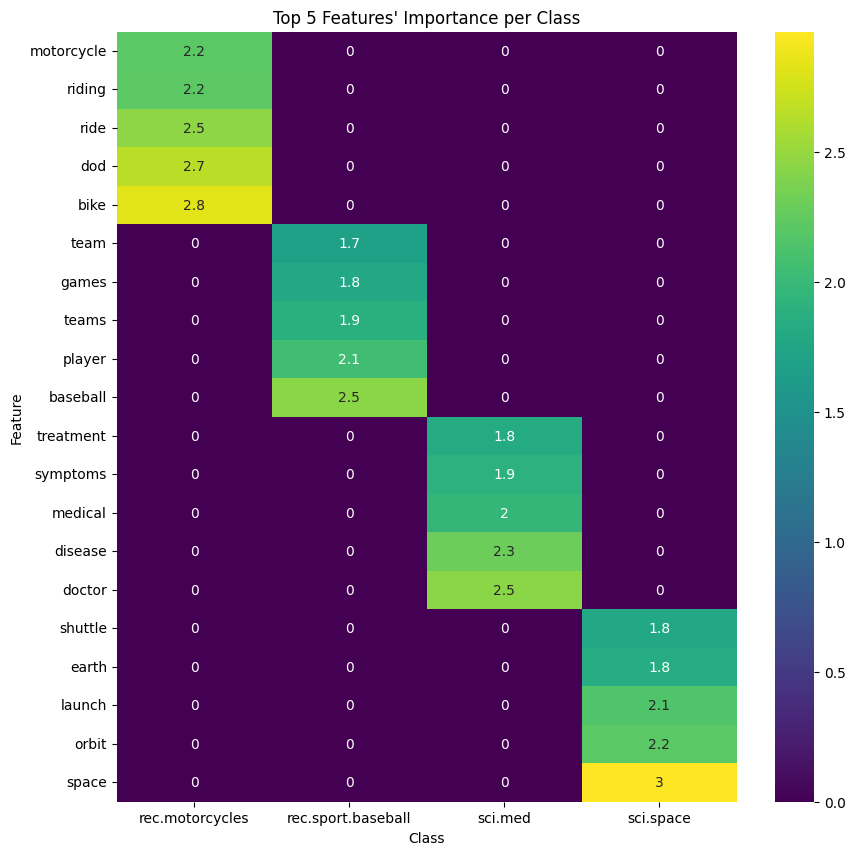

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_selectedD2, y_trainD2)

feature_names = feature_namesD2[top_features_indicesD2]

for i, class_label in enumerate(newsgroups_train.target_names):
    class_coefficients = lr.coef_[i]
    top_indices = np.argsort(class_coefficients)[-5:]
    print(f"Top 5 features for {class_label}: {feature_names[top_indices]}")



coefficients = lr.coef_

top_features_per_class_indices = np.argsort(coefficients, axis=1)[:, -5:]

top_features_scores = np.zeros((20, 4))

for class_idx in range(4):
    for feature_rank, feature_idx in enumerate(top_features_per_class_indices[class_idx]):
        top_features_scores[feature_rank + (class_idx * 5), class_idx] = coefficients[class_idx, feature_idx]

feature_labels = [feature_names[idx] for idx in top_features_per_class_indices.flatten()]
feature_labels = feature_labels[:20]
class_labels = newsgroups_train.target_names[:4]

plt.figure(figsize=(10, 10))
sns.heatmap(top_features_scores, annot=True, cmap="viridis", xticklabels=class_labels, yticklabels=feature_labels)
plt.title("Top 5 Features' Importance per Class")
plt.xlabel("Class")
plt.ylabel("Feature")
plt.show()



#To Array

In [31]:
import numpy as np
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn import preprocessing

def transform_array(arr):
    num_columns = 5
    result = np.zeros((len(arr), num_columns), dtype=int)

    for i, value in enumerate(arr):
        if 0 <= value < num_columns:
            result[i, value] = 1
    return result

import random
random.seed(1)

y_trainD2 = transform_array(y_trainD2)
y_testD2 = transform_array(y_testD2)

X_train_selectedD2, X_valid, y_trainD2, y_valid = model_selection.train_test_split(
    X_train_selectedD2, y_trainD2, test_size = 0.5, random_state=1, shuffle=True)

X_train_selectedD2 = X_train_selectedD2.toarray()
X_valid = X_valid.toarray()
X_test_selectedD2 = X_test_selectedD2.toarray()

#Multi Class Model

In [32]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):
        y_pred = np.exp(np.matmul(X, self.W))
        return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))

    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
        return losses_train, losses_valid

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        return diff.sum()


# Implementing and graphing Multiclass Logistic with 2nd data set (Experiment)

6.754667125085632e-12


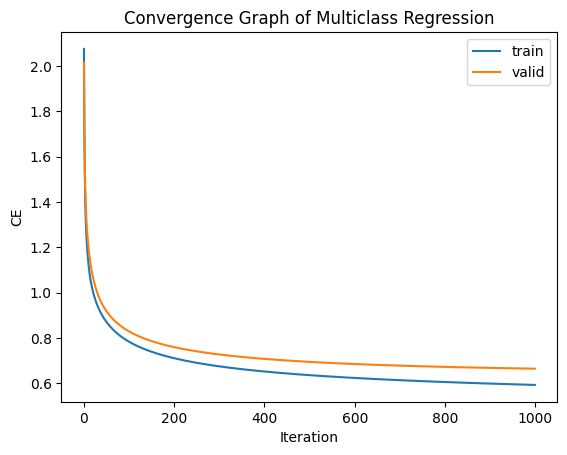

In [33]:
import numpy as np
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn import preprocessing


N, C = y_trainD2.shape
D = X_train_selectedD2.shape[1]

mlr = Multinomial_logistic(D, C)
print(mlr.check_grad(X_train_selectedD2, y_trainD2))
ce_train, ce_valid = mlr.fit(X_train_selectedD2, y_trainD2, X_valid, y_valid, lr = 0.0005, niter=1000)
optimal_niter = ce_valid.argmin()

plt.clf()
plt.plot(ce_train/X_train_selectedD2.shape[0], label='train')
plt.plot(ce_valid/X_valid.shape[0], label='valid')
plt.xlabel("Iteration")
plt.ylabel("CE")
plt.title('Convergence Graph of Multiclass Regression')
plt.legend()
# plt.show()
plt.savefig("training_ce.png", bbox_inches="tight", dpi=300)





# Accuracy for 2nd DataSet

<ipython-input-32-c2cfcff5c8e3>:6: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(np.matmul(X, self.W))
<ipython-input-32-c2cfcff5c8e3>:7: RuntimeWarning: invalid value encountered in divide
  return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)


Test Total Accuracy: 0.7302396736359
Test Class Accuracies: [0.5112443778110944, 0.8805970149253731, 0.7523219814241486, 0.9350180505415162, 0.8189415041782729]
Test Per-Class Accuracies: [0.88442211 0.64735516 0.50757576 0.56598985 0.61968085]
Overall Test Accuracy: 0.6455889852116268


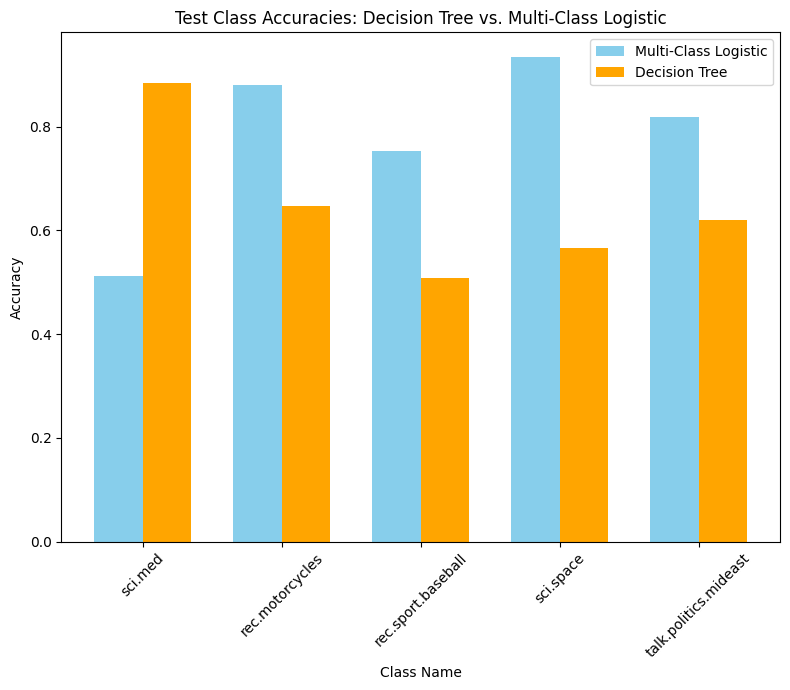

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def evaluate(y_true, y_pred):
    total_correct = np.sum(y_pred.argmax(axis=1) == y_true.argmax(axis=1))
    total_accuracy = total_correct / y_true.shape[0]

    class_accuracies = []
    for class_index in range(y_true.shape[1]):
        class_mask = y_true.argmax(axis=1) == class_index

        y_true_class = y_true[class_mask]
        y_pred_class = y_pred[class_mask]

        correct_per_class = np.sum(y_pred_class.argmax(axis=1) == class_index)

        total_per_class = y_true_class.shape[0]

        if total_per_class > 0:
            accuracy_per_class = correct_per_class / total_per_class
        else:
            accuracy_per_class = 0

        class_accuracies.append(accuracy_per_class)

    return total_accuracy, class_accuracies

train_total_accuracy, train_class_accuracies = evaluate(mlr.predict(X_train_selectedD2), y_trainD2)
valid_total_accuracy, valid_class_accuracies = evaluate(mlr.predict(X_valid), y_valid)
test_total_accuracy, test_class_accuracies = evaluate(mlr.predict(X_test_selectedD2), y_testD2)

print(f"Test Total Accuracy: {test_total_accuracy}")
print(f"Test Class Accuracies: {test_class_accuracies}")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_train_selectedD2, y_trainD2.argmax(axis=1))
y_test_pred = dtc.predict(X_test_selectedD2)

cm_test = confusion_matrix(y_testD2.argmax(axis=1), y_test_pred)

per_class_accuracies_test = cm_test.diagonal() / cm_test.sum(axis=1)

overall_test_accuracy = cm_test.diagonal().sum() / cm_test.sum()

print("Test Per-Class Accuracies:", per_class_accuracies_test)

print("Overall Test Accuracy:", overall_test_accuracy)


test_class_accuracies = test_class_accuracies
multi_class_accuracies = per_class_accuracies_test

categories = ['sci.med', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.politics.mideast']

fig, ax = plt.subplots(figsize=(8, 7))

pos = np.arange(len(categories))
bar_width = 0.35

dt_bars = ax.bar(pos - bar_width/2, test_class_accuracies, bar_width, label='Multi-Class Logistic', color='skyblue')
multi_class_bars = ax.bar(pos + bar_width/2, multi_class_accuracies, bar_width, label='Decision Tree', color='orange')

ax.set_xlabel('Class Name')
ax.set_ylabel('Accuracy')
ax.set_title('Test Class Accuracies: Decision Tree vs. Multi-Class Logistic')
ax.set_xticks(pos)
ax.set_xticklabels(categories)
ax.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [35]:
#logistic Model

logistic = lambda z: 1./ (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.verbose = verbose
        self.gradient_norms = []

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))
        grad = np.dot(x.T, yh - y)/N
        return grad

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            self.gradient_norms.append(np.linalg.norm(g))
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))
        return yh

# Creativity #1 - top 3 classes of 20 news and turn into logistic regression model (Experiment)

(4109, 1147)
700
[1 3 1 ... 6 1 6]
[1 0 1 ... 0 1 0]


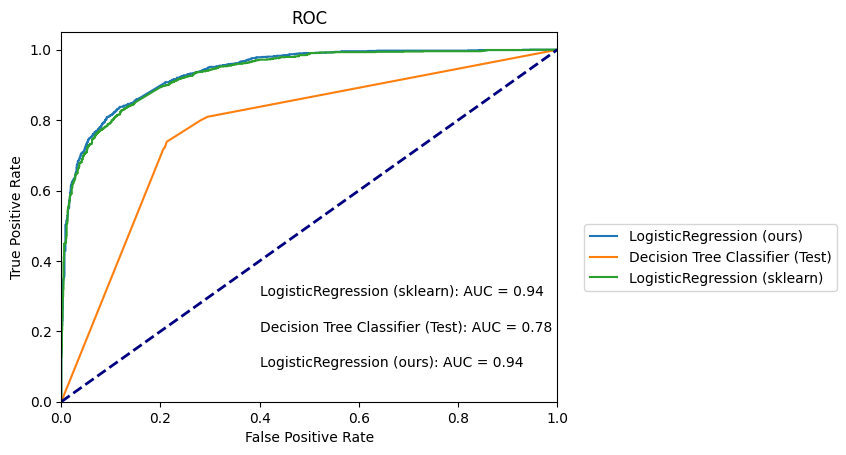

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


categories = ['sci.med', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.politics.mideast','comp.sys.mac.hardware','misc.forsale']


newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=['headers', 'footers', 'quotes'])
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=['headers', 'footers', 'quotes'])

count_vect = CountVectorizer(stop_words='english', max_df=0.5, min_df=0.01)

X_train_counts = count_vect.fit_transform(newsgroups_train.data)
print(X_train_counts.shape)

X_test_counts = count_vect.transform(newsgroups_test.data)

mi_scores = mutual_info_classif(X_train_counts, newsgroups_train.target, discrete_features=True)

word_indices = np.argsort(mi_scores)[::-1]

feature_namesD2 = np.array(count_vect.get_feature_names_out())

top_featuresD2 = feature_namesD2[word_indices[:700]]


top_features_indicesD2 = [count_vect.vocabulary_.get(feature) for feature in top_featuresD2]
feature_indices_dictD2 = {feature: count_vect.vocabulary_[feature] for feature in top_featuresD2 if feature in count_vect.vocabulary_}

print(len(feature_indices_dictD2))

X_train_selectedD2 = X_train_counts[:, top_features_indicesD2]
X_test_selectedD2 = X_test_counts[:, top_features_indicesD2]

y_trainD2 = newsgroups_train.target
y_testD2 = newsgroups_test.target

y_trainD2_logistic = ((y_trainD2 == 0) | (y_trainD2 == 1) | (y_trainD2 == 4)).astype(int) #top 3 classes
y_testD2_logistic = ((y_testD2 == 0) | (y_testD2 == 1) | (y_testD2 == 4)).astype(int) #top 3 classes

print(y_trainD2)
print(y_trainD2_logistic)

X_train_selectedD2 = X_train_selectedD2.toarray()
X_test_selectedD2 = X_test_selectedD2.toarray()

logit_model = LogisticRegression(max_iters=1e3, learning_rate = .3, epsilon=1e-5)

logit_model.fit(X_train_selectedD2, y_trainD2_logistic)
y_train_pred = logit_model.predict(X_train_selectedD2)
y_test_pred = logit_model.predict(X_test_selectedD2)


models = [DecisionTreeClassifier(),
          sk_LogisticRegression()]

perf = {}
fpr, tpr, _ = roc_curve(y_testD2_logistic, y_test_pred)
auroc = roc_auc_score(y_testD2_logistic, y_test_pred)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(X_train_selectedD2, y_trainD2_logistic)
    y_test_prob = fit.predict_proba(X_test_selectedD2)[:,1]
    fpr, tpr, _ = roc_curve(y_testD2_logistic, y_test_prob)
    auroc = roc_auc_score(y_testD2_logistic, y_test_prob)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf["Decision Tree Classifier (Test)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}

plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)


# Exploratory Analysis of Data: Class Distribution


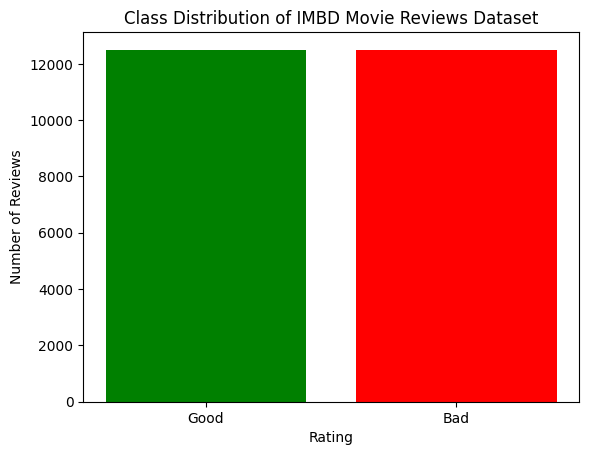

In [37]:
import matplotlib.pyplot as plt

good = 0
bad = 0
instances = 0
with open('labeledBow.feat', 'r') as file:
    for line in file:
      instances += 1
      parts = line.split()
      if parts:
        first_value = int(parts[0])
        if first_value <= 4:
          bad += 1
        if first_value >= 7:
          good += 1

classes = ['Good', 'Bad']
distribution = [good, bad]

plt.bar(classes, distribution, color=['green', 'red'])

plt.title('Class Distribution of IMBD Movie Reviews Dataset')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


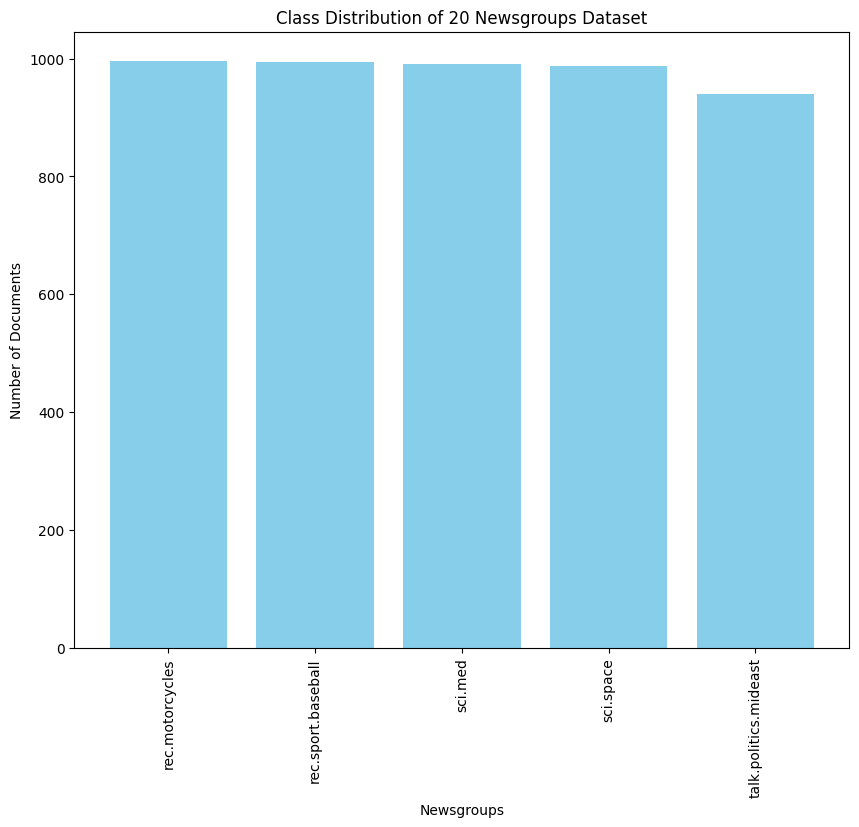

In [38]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np

categories = ['sci.med', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.politics.mideast']

newsgroups_data = fetch_20newsgroups(subset='all', categories=categories)

class_counts = np.bincount(newsgroups_data.target)
class_names = newsgroups_data.target_names

plt.figure(figsize=(10, 8))
plt.bar(range(len(class_names)), class_counts, color='skyblue')
plt.xlabel('Newsgroups')
plt.ylabel('Number of Documents')
plt.title('Class Distribution of 20 Newsgroups Dataset')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)  # Rotate x labels for better readability
plt.show()